Problem statement: To build a CNN based model which can accurately detect melanoma. Melanoma is a type of cancer that can be deadly if not detected early. It accounts for 75% of skin cancer deaths. A solution which can evaluate images and alert the dermatologists about the presence of melanoma has the potential to reduce a lot of manual effort needed in diagnosis.

### Importing Skin Cancer Data
#### To do: Take necessary actions to read the data

### Importing all the important libraries

In [2]:
import pathlib
import tensorflow as tf
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import os
import PIL
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.models import Sequential

In [3]:
## If you are using the data by mounting the google drive, use the following :
from google.colab import drive
drive.mount('/content/gdrive')

##Ref:https://towardsdatascience.com/downloading-datasets-into-google-drive-via-google-colab-bcb1b30b0166

Mounted at /content/gdrive


In [4]:
!unzip "/content/gdrive/MyDrive/CNN_assignment.zip" -d "/content/gdrive/MyDrive/CNN"

Archive:  /content/gdrive/MyDrive/CNN_assignment.zip
replace /content/gdrive/MyDrive/CNN/Skin cancer ISIC The International Skin Imaging Collaboration/Test/actinic keratosis/ISIC_0010512.jpg? [y]es, [n]o, [A]ll, [N]one, [r]ename: 

This assignment uses a dataset of about 2357 images of skin cancer types. The dataset contains 9 sub-directories in each train and test subdirectories. The 9 sub-directories contains the images of 9 skin cancer types respectively.

In [154]:
# Defining the path for train and test images
## Todo: Update the paths of the train and test dataset
data_dir_train = pathlib.Path("/content/gdrive/MyDrive/CNN/Skin cancer ISIC The International Skin Imaging Collaboration/Train")
data_dir_test = pathlib.Path('/content/gdrive/MyDrive/CNN/Skin cancer ISIC The International Skin Imaging Collaboration/Test')

In [155]:
image_count_train = len(list(data_dir_train.glob('*/*.jpg')))
print(image_count_train)
image_count_test = len(list(data_dir_test.glob('*/*.jpg')))
print(image_count_test)

2239
118


### Load using keras.preprocessing

Let's load these images off disk using the helpful image_dataset_from_directory utility.

### Create a dataset

Define some parameters for the loader:

In [7]:
batch_size = 32
img_height = 180
img_width = 180

Use 80% of the images for training, and 20% for validation.

In [8]:
## Write your train dataset here
from tensorflow.keras.preprocessing.image import ImageDataGenerator

tf.random.set_seed(123)
## Note use seed=123 while creating your dataset using tf.keras.preprocessing.image_dataset_from_directory
## Note, make sure your resize your images to the size img_height*img_width, while writting the dataset
train_ds =ImageDataGenerator(rescale=1./255)
test_ds = ImageDataGenerator(rescale=1./255)

#setup the path to our directories
train_dir = "/content/gdrive/MyDrive/CNN/Skin cancer ISIC The International Skin Imaging Collaboration/Train"
test_dir = "/content/gdrive/MyDrive/CNN/Skin cancer ISIC The International Skin Imaging Collaboration/Test"

# import the data from directoreis to turn into batches
train_data = train_ds.flow_from_directory(directory=train_dir,
                                          batch_size = batch_size,
                                          target_size =(img_height, img_width),
                                          class_mode='categorical',
                                          seed = 123)
valid_data = train_ds.flow_from_directory(directory=test_dir,
                                          batch_size = batch_size,
                                          target_size =(img_height, img_width),
                                          class_mode='categorical',
                                          seed = 123)

Found 2239 images belonging to 9 classes.
Found 118 images belonging to 9 classes.


In [ ]:
## Write your validation dataset here
## Note use seed=123 while creating your dataset using tf.keras.preprocessing.image_dataset_from_directory
## Note, make sure your resize your images to the size img_height*img_width, while writting the dataset
# val_ds = ##todo

In [146]:
# List out all the classes of skin cancer and store them in a list. 
# You can find the class names in the class_names attribute on these datasets. 
# These correspond to the directory names in alphabetical order.
class_names = list(train_data.class_indices.keys())
print(class_names)

['actinic keratosis', 'basal cell carcinoma', 'dermatofibroma', 'melanoma', 'nevus', 'pigmented benign keratosis', 'seborrheic keratosis', 'squamous cell carcinoma', 'vascular lesion']


### Visualize the data
#### Todo, create a code to visualize one instance of all the nine classes present in the dataset

In [9]:
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import random

def view_random_img(target_dir, target_class):
  #setup our target directory
  target_folder = target_dir+target_class

  #get a random image path, either from test or train directories
  rand_image = random.sample(os.listdir(target_folder), 1)

  #read the image and plot it
  img = mpimg.imread(target_folder+ "/"+rand_image[0])
  plt.imshow(img)
  plt.title(target_class)
  plt.axis('off')
  print(f"Image shape: {img.shape}")
  return img

### your code goes here, you can use training or validation data to visualize

Image shape: (450, 600, 3)


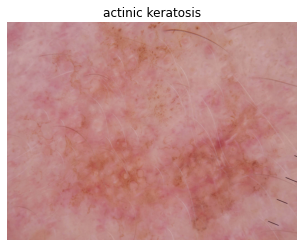

In [12]:
# view a random image, randomly chooses one of the 9 classes and picks an image randomly and displays it
rand_train = np.random.randint(9)
categories = ['actinic keratosis','basal cell carcinoma','dermatofibroma','melanoma','nevus',
              'pigmented benign keratosis','seborrheic keratosis','squamous cell carcinoma','vascular lesion']
img =view_random_img(target_dir="/content/gdrive/MyDrive/CNN/Skin cancer ISIC The International Skin Imaging Collaboration/Train/",
                target_class=categories[rand_train])

The `image_batch` is a tensor of the shape `(32, 180, 180, 3)`. This is a batch of 32 images of shape `180x180x3` (the last dimension refers to color channels RGB). The `label_batch` is a tensor of the shape `(32,)`, these are corresponding labels to the 32 images.

`Dataset.cache()` keeps the images in memory after they're loaded off disk during the first epoch.

`Dataset.prefetch()` overlaps data preprocessing and model execution while training.

In [67]:
AUTOTUNE = tf.data.experimental.AUTOTUNE
train_ds = train_ds.cache().shuffle(1000).prefetch(buffer_size=AUTOTUNE)
val_ds = val_ds.cache().prefetch(buffer_size=AUTOTUNE)

AttributeError: ignored

### Create the model
#### Todo: Create a CNN model, which can accurately detect 9 classes present in the dataset. Use ```layers.experimental.preprocessing.Rescaling``` to normalize pixel values between (0,1). The RGB channel values are in the `[0, 255]` range. This is not ideal for a neural network. Here, it is good to standardize values to be in the `[0, 1]`

In [13]:
### Your code goes here
model = Sequential()
model.add(keras.layers.Conv2D(filters=10, kernel_size=3,activation='relu', input_shape=(img_height, img_width,3)))
model.add(keras.layers.Conv2D(10,3,activation='relu'))
model.add(keras.layers.MaxPool2D(pool_size=2, padding='valid'))
model.add(keras.layers.Conv2D(10,3,activation='relu'))
model.add(keras.layers.Conv2D(10,3,activation='relu'))
model.add(keras.layers.MaxPool2D(2))
model.add(keras.layers.Flatten())
model.add(keras.layers.Dense(9, activation='softmax'))

### Compile the model
Choose an appropirate optimiser and loss function for model training 

In [14]:
### Todo, choose an appropirate optimiser and loss function
model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

In [15]:
# View the summary of all layers
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 178, 178, 10)      280       
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 176, 176, 10)      910       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 88, 88, 10)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 86, 86, 10)        910       
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 84, 84, 10)        910       
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 42, 42, 10)        0         
_________________________________________________________________
flatten (Flatten)            (None, 17640)             0

### Train the model

In [124]:
epochs = 20
history = model.fit(
  train_data,
  validation_data=valid_data,
  epochs=epochs
)

Epoch 1/20
70/70 [==============================] - 41s 583ms/step - loss: 2.0090 - accuracy: 0.2430 - val_loss: 2.3294 - val_accuracy: 0.1949
Epoch 2/20
70/70 [==============================] - 39s 564ms/step - loss: 1.7995 - accuracy: 0.3390 - val_loss: 2.2214 - val_accuracy: 0.1864
Epoch 3/20
70/70 [==============================] - 40s 564ms/step - loss: 1.6487 - accuracy: 0.4029 - val_loss: 2.3386 - val_accuracy: 0.3051
Epoch 4/20
70/70 [==============================] - 39s 565ms/step - loss: 1.4677 - accuracy: 0.4841 - val_loss: 2.3065 - val_accuracy: 0.2712
Epoch 5/20
70/70 [==============================] - 40s 572ms/step - loss: 1.3623 - accuracy: 0.5226 - val_loss: 2.5259 - val_accuracy: 0.3559
Epoch 6/20
70/70 [==============================] - 39s 564ms/step - loss: 1.2435 - accuracy: 0.5632 - val_loss: 2.4439 - val_accuracy: 0.3051
Epoch 7/20
70/70 [==============================] - 40s 574ms/step - loss: 1.1617 - accuracy: 0.5842 - val_loss: 2.8866 - val_accuracy: 0.3051

### Visualizing training results

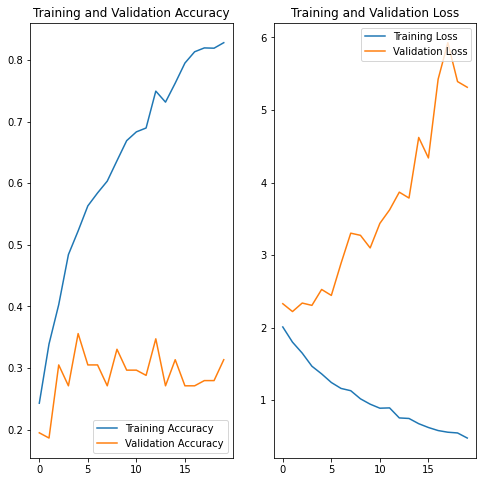

In [125]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']

epochs_range = range(epochs)

plt.figure(figsize=(8, 8))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()

#### Todo: Write your findings after the model fit, see if there is an evidence of model overfit or underfit

### Write your findings here

Based on the the generated graphs above for the Training Accuracy, Validation Accuracy, Training Loss, and Validation Loss, there does seem to be  evidence of overfitting,  as the Training Accuracy increases the Validation accuracy seems to fluctuate around 0.3 and as the training loss decreases the validation loss increases, to fix this we might have to add some drop out layers and augment the data

In [126]:
# Todo, after you have analysed the model fit history for presence of underfit or overfit, choose an appropriate data augumentation strategy. 
# Your code goes here
train_datagen_augmented = ImageDataGenerator(rescale=1./255,rotation_range=0.2,
                                             shear_range=0.2,zoom_range=0.2,
                                             width_shift_range=0.2,
                                             height_shift_range=0.3,
                                             horizontal_flip=True)
train_datagen = ImageDataGenerator(rescale=1./255)
test_datagen= ImageDataGenerator(rescale=1./255)


In [127]:

print("augmented training Data")
train_data_augmented = train_datagen_augmented.flow_from_directory(train_dir,
                                                                   target_size=(img_height, img_width),
                                                                   batch_size=batch_size,
                                                                   class_mode='categorical',
                                                                   shuffle=False)
print("non-augmented training data")
train_data = train_datagen.flow_from_directory(train_dir,
                                                        target_size=(img_height, img_width),
                                                        batch_size=batch_size,
                                                        class_mode='categorical',
                                                        shuffle=False)
img_size = (img_height, img_width)
print("non-augmented test data:")
test_data = test_datagen.flow_from_directory(test_dir,
                                                        target_size=img_size,
                                                        batch_size=batch_size,
                                                        class_mode='categorical',
                                                        shuffle=False)

augmented training Data
Found 2239 images belonging to 9 classes.
non-augmented training data
Found 2239 images belonging to 9 classes.
non-augmented test data:
Found 118 images belonging to 9 classes.


In [128]:
images,labels = train_data.next()
augmented_images, augmented_labels = train_data_augmented.next()

showing img num: 27


(-0.5, 179.5, 179.5, -0.5)

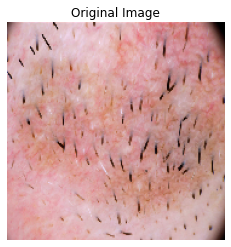

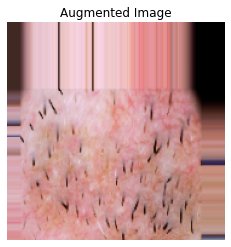

In [129]:
# Todo, visualize how your augmentation strategy works for one instance of training image.
# Your code goes here
import random
rand_num = random.randint(0,32)#batch size is 32
print(f"showing img num: {rand_num}")
plt.imshow(images[rand_num])
plt.title(f"Original Image")
plt.axis(False)
plt.figure()
plt.imshow(augmented_images[rand_num])
plt.title(f"Augmented Image")
plt.axis(False)

### Todo:
### Create the model, compile and train the model


In [130]:
## You can use Dropout layer if there is an evidence of overfitting in your findings

## Your code goes here
model_2 = Sequential()
model_2.add(keras.layers.Conv2D(filters=10, kernel_size=3,activation='relu', input_shape=(img_height, img_width,3)))
model_2.add(keras.layers.Conv2D(10,3,activation='relu'))
model_2.add(keras.layers.MaxPool2D(pool_size=2, padding='valid'))
model_2.add(keras.layers.Conv2D(10,3,activation='relu'))
model_2.add(keras.layers.Conv2D(10,3,activation='relu'))
model_2.add(keras.layers.MaxPool2D(2))
model_2.add(keras.layers.Flatten())
model_2.add(keras.layers.Dense(9, activation='softmax'))


### Compiling the model

In [131]:
## Your code goes here
model_2.compile(loss ='categorical_crossentropy',
                optimizer=tf.keras.optimizers.Adam(),
                metrics=['accuracy'])

### Training the model

In [132]:
model_2.summary()

Model: "sequential_6"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_15 (Conv2D)           (None, 178, 178, 10)      280       
_________________________________________________________________
conv2d_16 (Conv2D)           (None, 176, 176, 10)      910       
_________________________________________________________________
max_pooling2d_9 (MaxPooling2 (None, 88, 88, 10)        0         
_________________________________________________________________
conv2d_17 (Conv2D)           (None, 86, 86, 10)        910       
_________________________________________________________________
conv2d_18 (Conv2D)           (None, 84, 84, 10)        910       
_________________________________________________________________
max_pooling2d_10 (MaxPooling (None, 42, 42, 10)        0         
_________________________________________________________________
flatten_4 (Flatten)          (None, 17640)            

In [133]:
## Your code goes here, note: train your model for 20 epochs
history = model_2.fit(
  train_data_augmented,
  validation_data=test_data,
  epochs=epochs
)

Epoch 1/20
70/70 [==============================] - 52s 747ms/step - loss: 2.3225 - accuracy: 0.1617 - val_loss: 2.3414 - val_accuracy: 0.1356
Epoch 2/20
70/70 [==============================] - 52s 752ms/step - loss: 2.1099 - accuracy: 0.1956 - val_loss: 2.2939 - val_accuracy: 0.1356
Epoch 3/20
70/70 [==============================] - 54s 771ms/step - loss: 2.0620 - accuracy: 0.1675 - val_loss: 2.2496 - val_accuracy: 0.2288
Epoch 4/20
70/70 [==============================] - 52s 743ms/step - loss: 2.0566 - accuracy: 0.1371 - val_loss: 2.1657 - val_accuracy: 0.1356
Epoch 5/20
70/70 [==============================] - 52s 743ms/step - loss: 2.0581 - accuracy: 0.2063 - val_loss: 2.2087 - val_accuracy: 0.1356
Epoch 6/20
70/70 [==============================] - 52s 743ms/step - loss: 2.0595 - accuracy: 0.1679 - val_loss: 2.2149 - val_accuracy: 0.1356
Epoch 7/20
70/70 [==============================] - 52s 744ms/step - loss: 2.0461 - accuracy: 0.1434 - val_loss: 2.3000 - val_accuracy: 0.1356

### Visualizing the results

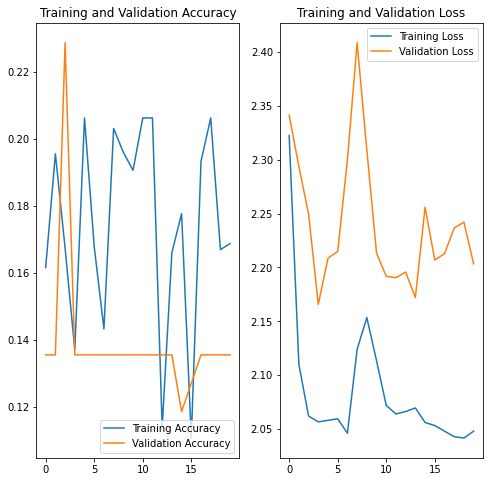

In [134]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']

epochs_range = range(epochs)

plt.figure(figsize=(8, 8))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()

#### Todo: Write your findings after the model fit, see if there is an evidence of model overfit or underfit. Do you think there is some improvement now as compared to the previous model run?

The model with the augmented data seem to be performing terribly, it is underfitting the training data, overall the model is not even close to the first model, as it is only predicting at 13% accuracy compared to the first model without the augmentation which was 32% accuracy, the models were the exact same with the same number of pooling and convolution layers, but augmenting the data seems to have confused the CNN, once again, there seems to be no improvement in the model compared to the first one.

#### **Todo:** Find the distribution of classes in the training dataset.
#### **Context:** Many times real life datasets can have class imbalance, one class can have proportionately higher number of samples compared to the others. Class imbalance can have a detrimental effect on the final model quality. Hence as a sanity check it becomes important to check what is the distribution of classes in the data.

In [172]:
## Your code goes here.
import os
path = "/content/gdrive/MyDrive/CNN/Skin cancer ISIC The International Skin Imaging Collaboration/Train"
# cpt = sum([len(files) for r, d, files in os.walk(path)])
for r, d, files in os.walk(path):
  if d == 'output':
    continue
  print(f"folder: {d} has: {len(files)}")

folder: ['actinic keratosis', 'basal cell carcinoma', 'dermatofibroma', 'melanoma', 'nevus', 'pigmented benign keratosis', 'seborrheic keratosis', 'squamous cell carcinoma', 'vascular lesion'] has: 0
folder: ['output'] has: 114
folder: [] has: 500
folder: ['output'] has: 376
folder: [] has: 500
folder: ['output'] has: 95
folder: [] has: 500
folder: ['output'] has: 438
folder: [] has: 500
folder: ['output'] has: 357
folder: [] has: 500
folder: ['output'] has: 462
folder: [] has: 500
folder: ['output'] has: 77
folder: [] has: 500
folder: ['output'] has: 181
folder: [] has: 500
folder: ['output'] has: 139
folder: [] has: 500


#### **Todo:** Write your findings here: 
#### - Which class has the least number of samples?
#### - Which classes dominate the data in terms proportionate number of samples?


#### **Todo:** Rectify the class imbalance
#### **Context:** You can use a python package known as `Augmentor` (https://augmentor.readthedocs.io/en/master/) to add more samples across all classes so that none of the classes have very few samples.

In [135]:
!pip install Augmentor

To use `Augmentor`, the following general procedure is followed:

1. Instantiate a `Pipeline` object pointing to a directory containing your initial image data set.<br>
2. Define a number of operations to perform on this data set using your `Pipeline` object.<br>
3. Execute these operations by calling the `Pipeline’s` `sample()` method.


In [149]:
path_to_training_dataset="/content/gdrive/MyDrive/CNN/Skin cancer ISIC The International Skin Imaging Collaboration/Train/"
import Augmentor
for i in class_names:
    p = Augmentor.Pipeline(path_to_training_dataset + i)
    p.rotate(probability=0.7, max_left_rotation=10, max_right_rotation=10)
    p.sample(500) ## We are adding 500 samples per class to make sure that none of the classes are sparse.

Executing Pipeline:   0%|          | 0/500 [00:00<?, ? Samples/s]

Initialised with 114 image(s) found.
Output directory set to /content/gdrive/MyDrive/CNN/Skin cancer ISIC The International Skin Imaging Collaboration/Train/actinic keratosis/output.

Processing <PIL.Image.Image image mode=RGB size=600x450 at 0x7F3E73482ED0>: 100%|██████████| 500/500 [00:18<00:00, 27.45 Samples/s]
Executing Pipeline:   0%|          | 0/500 [00:00<?, ? Samples/s]

Initialised with 376 image(s) found.
Output directory set to /content/gdrive/MyDrive/CNN/Skin cancer ISIC The International Skin Imaging Collaboration/Train/basal cell carcinoma/output.

Processing <PIL.Image.Image image mode=RGB size=600x450 at 0x7F3E7314D590>: 100%|██████████| 500/500 [00:18<00:00, 27.41 Samples/s]
Executing Pipeline:   0%|          | 0/500 [00:00<?, ? Samples/s]

Initialised with 95 image(s) found.
Output directory set to /content/gdrive/MyDrive/CNN/Skin cancer ISIC The International Skin Imaging Collaboration/Train/dermatofibroma/output.

Processing <PIL.Image.Image image mode=RGB size=600x450 at 0x7F3F3FA19390>: 100%|██████████| 500/500 [00:19<00:00, 25.87 Samples/s]
Executing Pipeline:   0%|          | 0/500 [00:00<?, ? Samples/s]

Initialised with 438 image(s) found.
Output directory set to /content/gdrive/MyDrive/CNN/Skin cancer ISIC The International Skin Imaging Collaboration/Train/melanoma/output.

Processing <PIL.Image.Image image mode=RGB size=1024x768 at 0x7F3E7322CE50>: 100%|██████████| 500/500 [01:27<00:00,  5.75 Samples/s]
Processing <PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=600x450 at 0x7F3E731EBC10>:   0%|          | 2/500 [00:00<01:07,  7.34 Samples/s]

Initialised with 357 image(s) found.
Output directory set to /content/gdrive/MyDrive/CNN/Skin cancer ISIC The International Skin Imaging Collaboration/Train/nevus/output.

Processing <PIL.Image.Image image mode=RGB size=1504x1129 at 0x7F3E731877D0>: 100%|██████████| 500/500 [01:23<00:00,  5.99 Samples/s]
Processing <PIL.Image.Image image mode=RGB size=600x450 at 0x7F3E7315D8D0>:   0%|          | 1/500 [00:00<01:02,  8.03 Samples/s]

Initialised with 462 image(s) found.
Output directory set to /content/gdrive/MyDrive/CNN/Skin cancer ISIC The International Skin Imaging Collaboration/Train/pigmented benign keratosis/output.

Processing <PIL.Image.Image image mode=RGB size=600x450 at 0x7F3E7321D650>: 100%|██████████| 500/500 [00:19<00:00, 26.09 Samples/s]
Executing Pipeline:   0%|          | 0/500 [00:00<?, ? Samples/s]

Initialised with 77 image(s) found.
Output directory set to /content/gdrive/MyDrive/CNN/Skin cancer ISIC The International Skin Imaging Collaboration/Train/seborrheic keratosis/output.

Processing <PIL.Image.Image image mode=RGB size=1024x768 at 0x7F3E731EB4D0>: 100%|██████████| 500/500 [00:42<00:00, 11.85 Samples/s]
Processing <PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=600x450 at 0x7F3E7321D250>:   0%|          | 2/500 [00:00<00:58,  8.49 Samples/s]

Initialised with 181 image(s) found.
Output directory set to /content/gdrive/MyDrive/CNN/Skin cancer ISIC The International Skin Imaging Collaboration/Train/squamous cell carcinoma/output.

Processing <PIL.Image.Image image mode=RGB size=600x450 at 0x7F3E72A966D0>: 100%|██████████| 500/500 [00:19<00:00, 25.97 Samples/s]
Executing Pipeline:   0%|          | 0/500 [00:00<?, ? Samples/s]

Initialised with 139 image(s) found.
Output directory set to /content/gdrive/MyDrive/CNN/Skin cancer ISIC The International Skin Imaging Collaboration/Train/vascular lesion/output.

Processing <PIL.Image.Image image mode=RGB size=600x450 at 0x7F3E734A84D0>: 100%|██████████| 500/500 [00:19<00:00, 25.67 Samples/s]


Augmentor has stored the augmented images in the output sub-directory of each of the sub-directories of skin cancer types.. Lets take a look at total count of augmented images.

In [156]:
image_count_train = len(list(data_dir_train.glob('*/output/*.jpg')))
print(image_count_train)

4500


### Lets see the distribution of augmented data after adding new images to the original training data.

In [232]:
# path_list_old = [x for x in glob(os.path.join(data_dir_train,'*/*.jpg'))]
path_list_old = [x for x in glob(os.path.join(data_dir_train,'*/*.jpg'))]
lesion_list_old = [os.path.basename(os.path.dirname(y)) for y in glob(os.path.join(data_dir_train, '*/*.jpg'))]

In [158]:
from glob import glob

path_list = [x for x in glob(os.path.join(data_dir_train, '*','output', '*.jpg'))]
path_list

['/content/gdrive/MyDrive/CNN/Skin cancer ISIC The International Skin Imaging Collaboration/Train/actinic keratosis/output/actinic keratosis_original_ISIC_0026575.jpg_455be6c0-aa06-46b3-b1a3-876feeb38711.jpg',
 '/content/gdrive/MyDrive/CNN/Skin cancer ISIC The International Skin Imaging Collaboration/Train/actinic keratosis/output/actinic keratosis_original_ISIC_0030133.jpg_756862d1-f546-44be-9cf0-80ecefab8b3f.jpg',
 '/content/gdrive/MyDrive/CNN/Skin cancer ISIC The International Skin Imaging Collaboration/Train/actinic keratosis/output/actinic keratosis_original_ISIC_0033358.jpg_1df31ebb-f2b7-4351-bc5a-66a3593fc02f.jpg',
 '/content/gdrive/MyDrive/CNN/Skin cancer ISIC The International Skin Imaging Collaboration/Train/actinic keratosis/output/actinic keratosis_original_ISIC_0029141.jpg_824ecdc9-1233-4aac-927a-1416dc95c7e3.jpg',
 '/content/gdrive/MyDrive/CNN/Skin cancer ISIC The International Skin Imaging Collaboration/Train/actinic keratosis/output/actinic keratosis_original_ISIC_00298

In [159]:
lesion_list_new = [os.path.basename(os.path.dirname(os.path.dirname(y))) for y in glob(os.path.join(data_dir_train, '*','output', '*.jpg'))]
lesion_list_new

['actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic 

In [233]:
dataframe_dict_old = dict(zip(path_list_old, lesion_list_old))

In [235]:
original = pd.DataFrame(list(dataframe_dict_old.items()),columns = ['Path','Label'])
original.head()

,Path,Label
0,/content/gdrive/MyDrive/CNN/Skin cancer ISIC T...,actinic keratosis
1,/content/gdrive/MyDrive/CNN/Skin cancer ISIC T...,actinic keratosis
2,/content/gdrive/MyDrive/CNN/Skin cancer ISIC T...,actinic keratosis
3,/content/gdrive/MyDrive/CNN/Skin cancer ISIC T...,actinic keratosis
4,/content/gdrive/MyDrive/CNN/Skin cancer ISIC T...,actinic keratosis


In [236]:
dataframe_dict_new = dict(zip(path_list, lesion_list_new))

In [237]:
df2 = pd.DataFrame(list(dataframe_dict_new.items()),columns = ['Path','Label'])
new_df = original.append(df2)

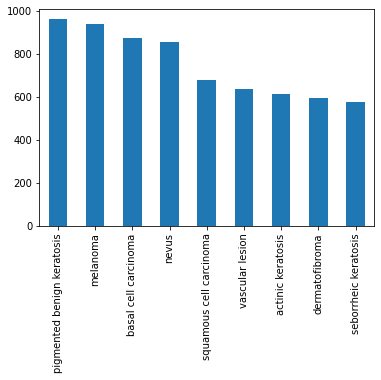

In [240]:
new_df['Label'].value_counts().plot(kind='bar')

So, now we have added 500 images to all the classes to maintain some class balance. We can add more images as we want to improve training process.

#### **Todo**: Train the model on the data created using Augmentor

In [199]:
batch_size = 32
img_height = 180
img_width = 180

#### **Todo:** Create a training dataset

In [200]:
train_path = "/content/gdrive/MyDrive/CNN/Skin cancer ISIC The International Skin Imaging Collaboration/Train"
data_dir_train=train_path
train_ds = tf.keras.preprocessing.image_dataset_from_directory(
  data_dir_train,
  seed=123,
  validation_split = 0.2,
  subset ="training",  ## Todo choose the correct parameter value, so that only training data is refered to,,
  image_size=(img_height, img_width),
  batch_size=batch_size)

Found 6739 files belonging to 9 classes.
Using 5392 files for training.


#### **Todo:** Create a validation dataset

In [201]:
val_ds = tf.keras.preprocessing.image_dataset_from_directory(
  data_dir_train,
  seed=123,
  validation_split = 0.2,
  subset ="validation", ## Todo choose the correct parameter value, so that only validation data is refered to,
  image_size=(img_height, img_width),
  batch_size=batch_size)

Found 6739 files belonging to 9 classes.
Using 1347 files for validation.


#### **Todo:** Create your model (make sure to include normalization)

In [225]:
## your code goes here
# model_3 = Sequential()
# model_3.add(keras.layers.Conv2D(filters=10, kernel_size=3,activation='relu', input_shape=(img_height, img_width,3)))
# model_3.add(keras.layers.Conv2D(10,3,activation='relu'))
# model_3.add(keras.layers.MaxPool2D(pool_size=2, padding='valid'))
# # model_3.add(keras.layers.Dropout(0.5))
# model_3.add(keras.layers.Conv2D(10,3,activation='relu'))
# model_3.add(keras.layers.Conv2D(10,3,activation='relu'))
# model_3.add(keras.layers.MaxPool2D(2))
# # model_3.add(keras.layers.Dropout(0.5))
# model_3.add(keras.layers.Flatten())
# model_3.add(keras.layers.Dense(9, activation='softmax'))


#using an array implementation seems to have fixed the error
model_3 = Sequential([                  
  layers.experimental.preprocessing.Rescaling(1./255,input_shape=(img_height, img_width, 3)),
  layers.Conv2D(32, 3, padding='valid', activation='relu'),
  layers.BatchNormalization(),
  layers.Conv2D(32, 3, padding='valid', activation='relu'),
  layers.BatchNormalization(),
  layers.MaxPooling2D(),
  layers.Dropout(0.5),
  layers.Conv2D(64, 3, padding='valid', activation='relu'),
  layers.BatchNormalization(),
  layers.Conv2D(64, 3, padding='valid', activation='relu'),
  layers.BatchNormalization(),
  layers.MaxPooling2D(),
  layers.Dropout(0.5),
  layers.Conv2D(128, 3, padding='valid', activation='relu'),
  layers.BatchNormalization(),
  layers.Conv2D(128, 3, padding='valid', activation='relu'),
  layers.BatchNormalization(),
  layers.MaxPooling2D(),
  layers.Dropout(0.5),
  layers.Flatten(),
  # layers.Dense(512, kernel_regularizer=tf.keras.regularizers.L2(0.01), activation='relu'),
  # layers.Dropout(0.5),
  layers.Dense(9,activation='softmax')
])

#### **Todo:** Compile your model (Choose optimizer and loss function appropriately)

In [226]:
model_3.summary()

Model: "sequential_13"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
rescaling_6 (Rescaling)      (None, 180, 180, 3)       0         
_________________________________________________________________
conv2d_67 (Conv2D)           (None, 178, 178, 32)      896       
_________________________________________________________________
batch_normalization_36 (Batc (None, 178, 178, 32)      128       
_________________________________________________________________
conv2d_68 (Conv2D)           (None, 176, 176, 32)      9248      
_________________________________________________________________
batch_normalization_37 (Batc (None, 176, 176, 32)      128       
_________________________________________________________________
max_pooling2d_35 (MaxPooling (None, 88, 88, 32)        0         
_________________________________________________________________
dropout_23 (Dropout)         (None, 88, 88, 32)      

In [227]:
## your code goes here
model_3.compile(loss =tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
                optimizer=tf.keras.optimizers.Adam(),
                metrics=['accuracy'])

#### **Todo:**  Train your model

In [228]:
epochs = 30
## Your code goes here, use 50 epochs.
history = model_3.fit(
  train_ds,
  validation_data=val_ds,
  epochs=epochs
)

Epoch 1/30


/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/backend.py:4930: UserWarning: "`sparse_categorical_crossentropy` received `from_logits=True`, but the `output` argument was produced by a sigmoid or softmax activation and thus does not represent logits. Was this intended?"
  '"`sparse_categorical_crossentropy` received `from_logits=True`, but '


169/169 [==============================] - 45s 245ms/step - loss: 6.8751 - accuracy: 0.3366 - val_loss: 5.7097 - val_accuracy: 0.1136
Epoch 2/30
169/169 [==============================] - 41s 237ms/step - loss: 5.3785 - accuracy: 0.3967 - val_loss: 4.9996 - val_accuracy: 0.0854
Epoch 3/30
169/169 [==============================] - 41s 237ms/step - loss: 4.5927 - accuracy: 0.4481 - val_loss: 2.4152 - val_accuracy: 0.2777
Epoch 4/30
169/169 [==============================] - 41s 238ms/step - loss: 4.3842 - accuracy: 0.4351 - val_loss: 3.0820 - val_accuracy: 0.2695
Epoch 5/30
169/169 [==============================] - 41s 239ms/step - loss: 3.1616 - accuracy: 0.4839 - val_loss: 3.9378 - val_accuracy: 0.3073
Epoch 6/30
169/169 [==============================] - 41s 236ms/step - loss: 3.1623 - accuracy: 0.5095 - val_loss: 35.0857 - val_accuracy: 0.1826
Epoch 7/30
169/169 [==============================] - 41s 235ms/step - loss: 3.0003 - accuracy: 0.5030 - val_loss: 13.0371 - val_accuracy: 0

#### **Todo:**  Visualize the model results

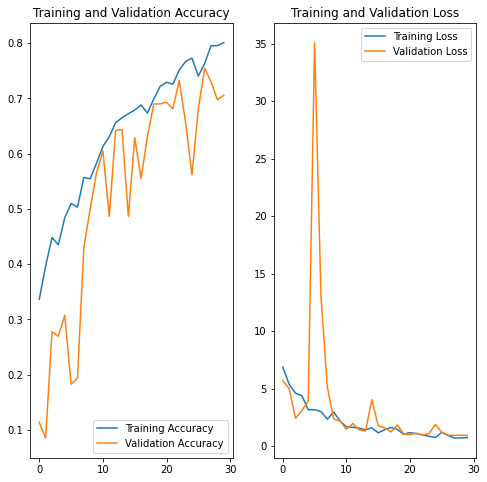

In [229]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']

epochs_range = range(epochs)

plt.figure(figsize=(8, 8))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()

#### **Todo:**  Analyze your results here. Did you get rid of underfitting/overfitting? Did class rebalance help?



This Model seems to outperform the previous 2 models, we can see from the chart above that as the Training Accuracy increases the Validation Accuracy also increases and a s the Training Loss decreases so does the Validation Loss and I am confident that if we increases the number of epochs then the accuracy will increase and loss will decrease.

Summarize:
- This new model is classifying the images well with 70% accuracy
- compared to the previous models it is outperforming both of them
- the accuracy is more than the previous models, which makes it our best model
- the class rebalancing helped in fixing the overfitting of the previous model and has improved it.